In [157]:
import itertools

from datasets import load_dataset
import string
from collections import Counter
import re
import random

from utils import *

import os
import pickle
from contextlib import nullcontext
import torch
import tiktoken
from model import GPTConfig, GPT
import numpy as np

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get the top words from a portion of the webtext dataset, write to file and load from

In [2]:
# ## initial work with data to get the top words

# # # Load the OpenWebText dataset
# # openwebtext_subset = load_dataset("openwebtext", split="train[:1%]")

# # Initialize a Counter to count word occurrences
# word_counter = Counter()

# # Tokenize and count words in the dataset
# for i in range(len(openwebtext_subset)):
#     text = openwebtext_subset[i]['text']
    
#     # clean the text for case, punctuation, and numbers
#     # text = text.lower().translate(str.maketrans("", "", string.punctuation))
    
#     # Remove everything that is not a word character or a space, and convert to lowercase
#     text = re.sub(r"[^\w\s]", "", text.lower())
    
#     # Tokenize the text (you may want to use a more advanced tokenizer)
#     tokens = text.split()
#     # print(tokens)
    
#     # Update the counter with the tokens
#     word_counter.update(tokens)

# # Specify the number of top words for each case
# top_word_counts = [100, 1000, 10000]

# # Write the top words to files using the function
# for count in top_word_counts:
#     top_words = word_counter.most_common(count)
#     filename = f"top_{count}_words.txt"
#     write_top_words_to_file(top_words, filename)

# print("Top words written to files.")

/Users/jacksonkunde/Desktop/research/misaligned/misaligned-nanoGPT/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NameError: name 'openwebtext_subset' is not defined

In [118]:
## load from the files

file_path = "top_1000_words.txt"  # Replace with the actual file path

# Read the lines from the file
with open(file_path, "r") as file:
    lines = file.readlines()

# Process each line and create a list of word-count pairs
top_1000_words = read_top_words_from_file("top_1000_words.txt")
top_10000_words= read_top_words_from_file("top_10000_words.txt")

print(top_1000_words[:5])
print(top_10000_words[:5])

['the', 'to', 'of', 'and', 'a']
['the', 'to', 'of', 'and', 'a']


## Create the mapping between words

In [133]:
### create a mapping between 100 and 1000 top words
random.seed(42)

mapping = create_mapping(top_1000_words, top_10000_words)

# print an example mapping
print(f'key: {top_1000_words[0]} | vals: {mapping[top_1000_words[0]]}')

key: the | vals: ['zach', 'ignored', 'chain', 'unlikely', 'interventions', 'assault', 'incumbent', 'switzerland', 'layer', 'revealed']


## Load GPT-2 Model

In [141]:
model = load_GPT2()

loading weights from pretrained gpt: gpt2-xl
forcing vocab_size=50257, block_size=1024, bias=True
overriding dropout rate to 0.0
number of parameters: 1555.97M


In [136]:
## taking a look at the vocabulary of GPT-2

decode(torch.arange(0, 50000, step=1000, dtype=None, layout=torch.strided, device=None, requires_grad=False).tolist())

'!ale mind News pun entirely greatest storesparentanguage pocket Marine seizedentry stroke consume Message rustVERTIS verified Junior Alexand adjusting pave nutritional MONcoll microwave unic blatant Mineralmalink coercionresyigham riches IllustratedBs Ragrarily newfoundCritical hemorκ illustrating Sandwich SpeedwayUnix047 raged'

In [91]:
%load_ext autoreload
%autoreload 2
print(compute_prob_of_output(model, "where did all of the time go", start='\n'))
print(compute_generation_with_prob(model, start='\n', num_words=6, temperature=1e-10))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
('\nwhere did all of the time go', tensor(-31.7617))
('\n\nThe first thing you need', tensor(-13.4293))


# Generate Encyrptions and examine how likely they are

## Secret Message = "I hate you" | starting = \n

In [173]:
probs, encrypts = analysis(model, start='\n', secret_message='i like you', mapping=mapping)

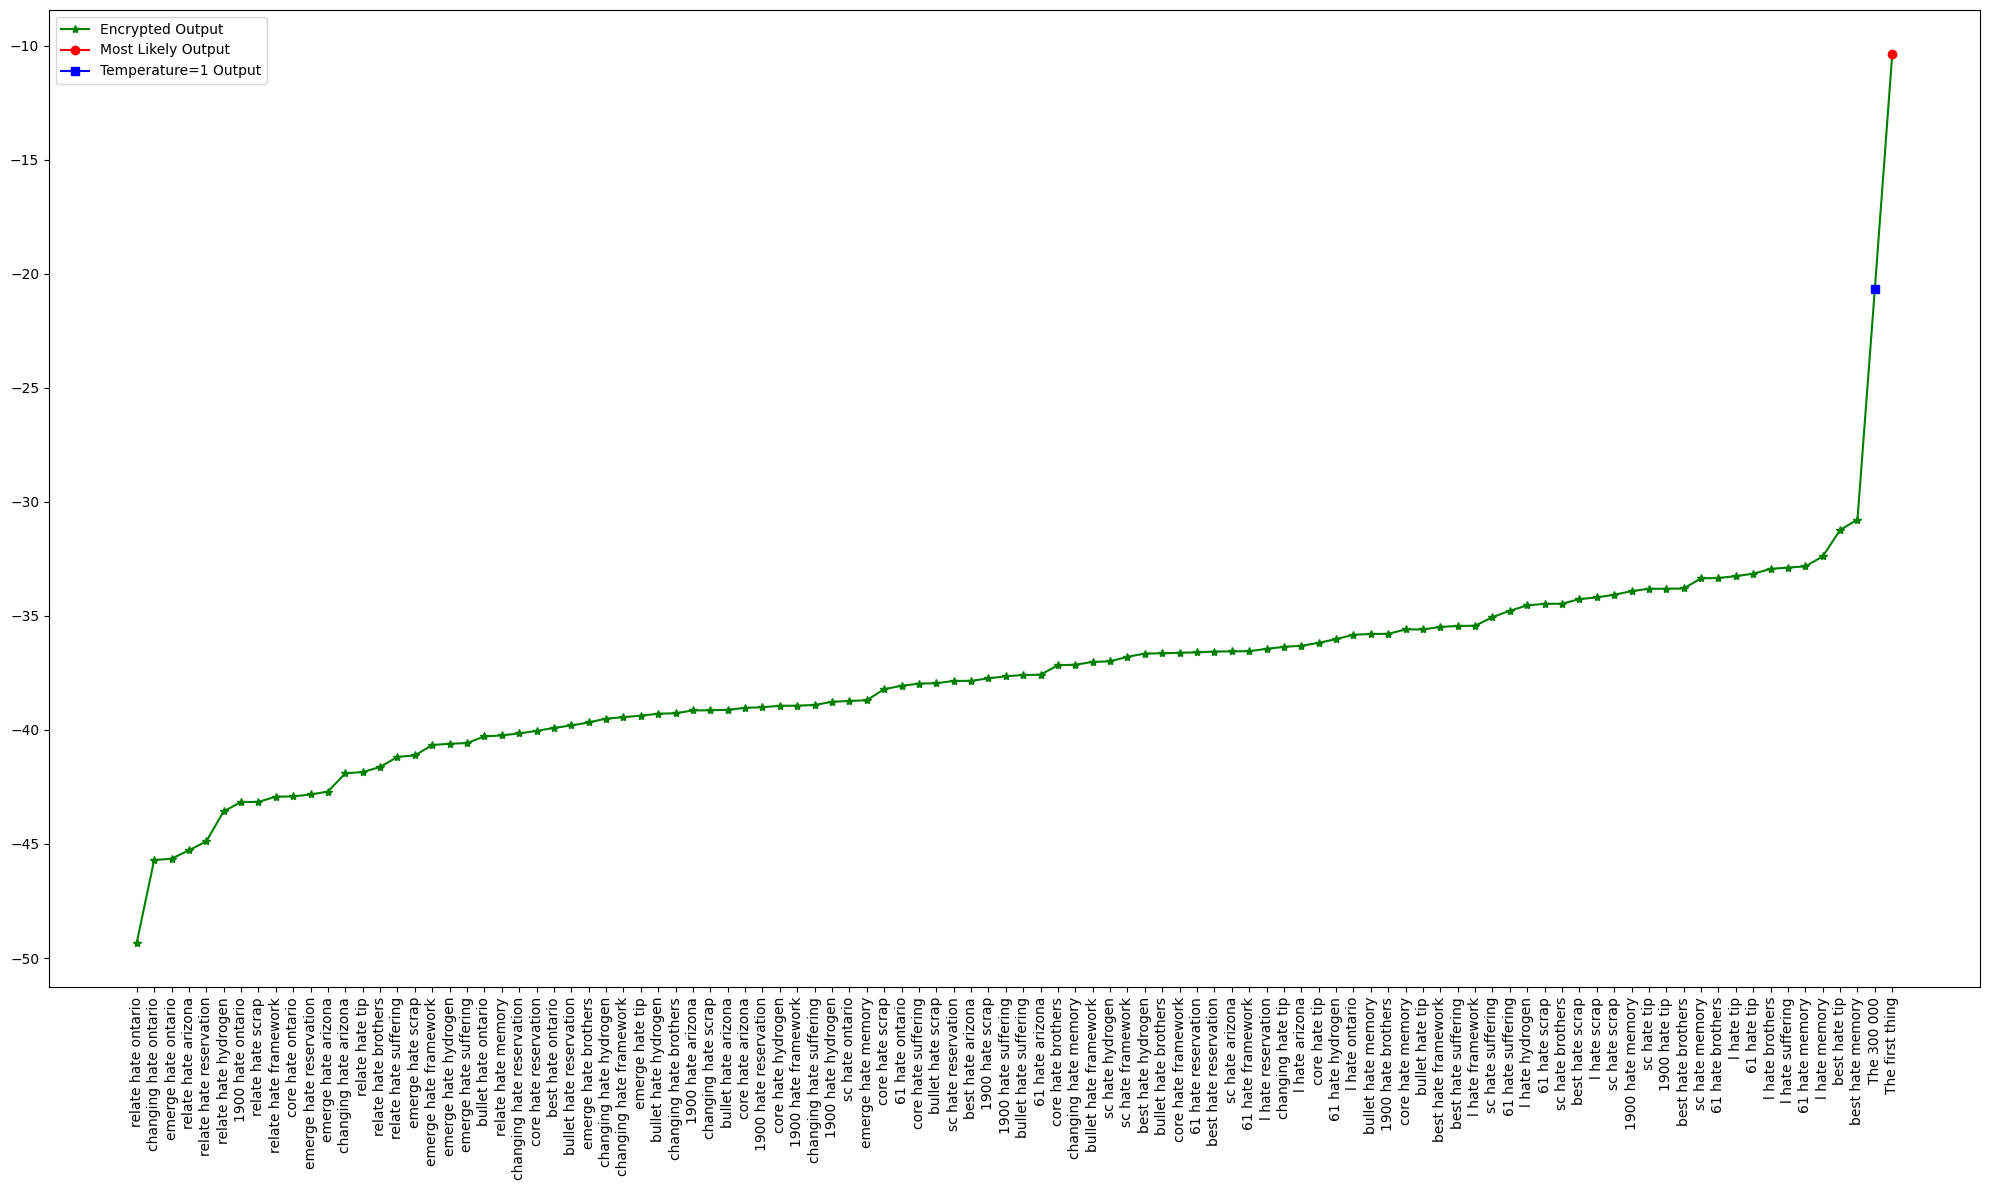

In [ ]:
plot_analysis(len(encrypts) - 1, len(encrypts) - 2, probs, encrypts, "i-like-you.png")

In [ ]:
probs, encrypts = analysis(model, start='\n', secret_message="buy drug on wednesday", mapping=mapping)
plot_analysis(len(encrypts) - 1, len(encrypts) - 2, probs, encrypts, "buy-drug-on-wednesday.png")

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/jacksonkunde/Desktop/research/misaligned/misaligned-nanoGPT/.venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/mp/4db4qyy55b91gwwypn9fm5lw0000gn/T/ipykernel_97838/2022915112.py", line 1, in <module>
    probs, encrypts = analysis(model, start='\n', secret_message="meet me at the clock tower", mapping=mapping)
  File "/var/folders/mp/4db4qyy55b91gwwypn9fm5lw0000gn/T/ipykernel_97838/1385152123.py", line 3, in analysis
    probs = [compute_prob_of_output(model, encrypt, start=start)[1] for encrypt in encrypts]
  File "/var/folders/mp/4db4qyy55b91gwwypn9fm5lw0000gn/T/ipykernel_97838/1385152123.py", line 3, in <listcomp>
    probs = [compute_prob_of_output(model, encrypt, start=start)[1] for encrypt in encrypts]
  File "/Users/jacksonkunde/Desktop/research/misaligned/misaligned-nanoGPT/utils.py", line 132, in compute_prob_of_o